In [13]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from image_classification_model_utils import initialize_parameters,forward_propagation,backward_propagation
from image_classification_model_utils import activation,compute_cost,activation_backward,update_parameters,predict
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import sys

def load_dataset(train_data_set,test_data_set):
    train_dataset = h5py.File(str(train_data_set), "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(str(test_data_set), "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels
 
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [15]:
train_data_set = './datasets/train_catvnoncat.h5'
test_data_set = './datasets/test_catvnoncat.h5'

# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset(train_data_set,test_data_set)

y = 0. It's a non-cat picture.


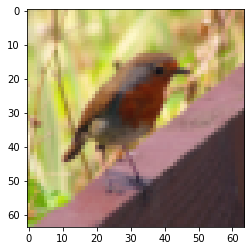

In [16]:
# Example of a picture
index = 10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0, index]) + ". It's a " + classes[train_set_y[0, index]].decode("utf-8") + " picture.")

In [17]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

train_X = train_set_x_orig 
train_Y = train_set_y
test_X = test_set_x_orig
test_Y = test_set_y

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [18]:
# Reshape the training and test examples 
train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

train_X = train_x
test_X = test_x

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [19]:
def model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False): #lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = forward_propagation(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = backward_propagation(AL, Y, caches)
    
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
      
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.693049
Cost after iteration 200: 0.692950
Cost after iteration 300: 0.692851
Cost after iteration 400: 0.692753
Cost after iteration 500: 0.692654
Cost after iteration 600: 0.692556
Cost after iteration 700: 0.692458
Cost after iteration 800: 0.692360
Cost after iteration 900: 0.692262
Cost after iteration 1000: 0.692165
Cost after iteration 1100: 0.692068
Cost after iteration 1200: 0.691970
Cost after iteration 1300: 0.691874
Cost after iteration 1400: 0.691777
Cost after iteration 1500: 0.691680
Cost after iteration 1600: 0.691584
Cost after iteration 1700: 0.691488
Cost after iteration 1800: 0.691392
Cost after iteration 1900: 0.691296
Cost after iteration 2000: 0.691201
Cost after iteration 2100: 0.691106
Cost after iteration 2200: 0.691010
Cost after iteration 2300: 0.690916
Cost after iteration 2400: 0.690821
Cost after iteration 2500: 0.690726
Cost after iteration 2600: 0.690632
Cost after iteration 2700: 0.690538
Cost

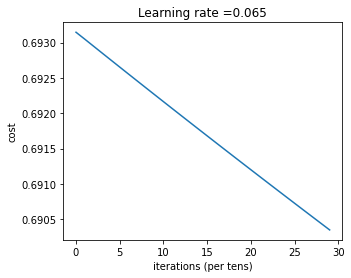

In [20]:
layers_dims = [12288, 20, 7, 5, 1]
parameters = model(train_X, train_Y, layers_dims, learning_rate=0.065, num_iterations=3000, print_cost=True)

In [21]:
pred_train = predict(train_X, train_Y, parameters)

Accuracy: 0.6555023923444976


In [22]:
pred_test = predict(test_X, test_Y, parameters)

Accuracy: 0.3400000000000001
